# Whole skeleton neuron df queying

In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import KDTree
import random
import timeit
from scipy.spatial import distance as dst
import itertools
import pickle
import scipy.stats as stats
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 16
import seaborn as sns
#sns.set_theme(style="whitegrid")
from scipy.stats.stats import pearsonr
name_list = ['human_neuron','rat_neuron',
            'monkey_neuron','zebrafish_neuron','fruit_fly_2','fruit_fly_3','fruit_fly_1','fruit_fly_4',
    'vascular_2','vascular_3','vascular_1','tree','mitochondrial','anthill','root_1','root_2']
color_dict = {'root_1':'green','root_2':'olive','mitochondrial':'y','vascular_1':'red','vascular_2':'crimson','vascular_3':'salmon',
              'fruit_fly_2':'purple','fruit_fly_3':'pink','tree':'brown','rat_neuron':'lightblue','human_neuron':'blue',
              'anthill':'silver','fruit_fly_1':'deeppink','fruit_fly_4':'plum','zebrafish_neuron':'cyan','monkey_neuron':'teal'}
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.titlesize'] = 20
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16) 


In [116]:
path_source = '1. results_basic_properties/'
figure_save_path = '../7. figures/'
all_results = {}
for name in name_list:
    infile = open(path_source + name +'_basic_results.pkl','rb')
    all_results[name] = pickle.load(infile)

FileNotFoundError: [Errno 2] No such file or directory: '1. results_basic_properties/monkey_neuron_basic_results.pkl'

In [117]:
data = {}
for name in all_results.keys():
    data['dataset'] = []
    data['segment_length'] = []
    data['radius_length'] = []
    data['fractal_dimension'] = []
    data['number_of_links'] = []
    data['number_of_nodes'] = []
    data['number_of_segments'] = []
    data['density_max'] = []

for name in all_results.keys():
    data['dataset'].append(name)
    data['segment_length'].append(str(np.round(all_results[name]['mean_segment_length'],2)) + ' \u00B1 ' + str(np.round(np.std(all_results[name]['segment_length_list']),2)))
    data['radius_length'].append(str(np.round(all_results[name]['mean_radius_length'],2)) + ' \u00B1 ' + str(np.round(np.std(all_results[name]['radius_list']),2)))
    data['fractal_dimension'].append(np.round(all_results[name]['fractal_dimension'],2))
    data['number_of_links'].append(all_results[name]['number_of_links'])
    data['number_of_nodes'].append(all_results[name]['number_of_nodes'])
    data['number_of_segments'].append(all_results[name]['number_of_segments'])
    data['density_max'].append(all_results[name]['density_max'])
df_data = pd.DataFrame(data)
df_data

,dataset,segment_length,radius_length,fractal_dimension,number_of_links,number_of_nodes,number_of_segments,density_max
0,human_neuron,1.24 ± 1.29,0.13 ± 0.11,1.62,631,632,41087,0.011318
1,rat_neuron,2.56 ± 2.2,0.52 ± 0.37,1.73,185,186,4599,0.019410


In [102]:
#plt.figure(figsize=(12,8))
all_densities_dict = {}
for name in name_list:
    plt.figure(figsize=(12,8))
    #infile = open(name + ".all_densities.pkl",'rb')
    all_densities = all_results[name]['density_list']
    all_densities= np.where(np.isnan(all_densities), 0, all_densities)
    all_densities = np.array(all_densities)
    #all_densities  = all_densities[all_densities  != 0]
    all_densities_dict[name] = np.array(all_densities)
    print(np.max( np.array(all_densities)))
    #plt.hist(all_densities,label=name,color=color_dict[name],bins=50)
    #plt.yscale('log')
    #plt.xlim(-0.05,1.05)
    #plt.ylim(0,1)
    #plt.yscale('log')
    #plt.legend()
    #plt.xlabel('Local density')
    #plt.ylabel('Count')
    #plt.savefig(name + "_densities.svg", format='svg')

0.01131789195898493
0.019409623771278046
5.548870846400844
41.77414435532677
0.3462464819207218
0.32020103172542824
0.8014185444289647
1.2859627925019783
0.17461272933690986
0.17843294914861876
0.6783968461315871
0.01224522386538676
0.06489653839842784
0.2650520853425173
0.058472859715560835
0.1402029779950737


<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

In [103]:
all_densities

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       2.34190877e-03, 2.17115478e-04, 0.00000000e+00, 1.03182631e-03,
       9.81423381e-04, 0.00000000e+00, 4.43489659e-05, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 7.00305966e-05, 0.00000000e+00, 0.00000000e+00,
       1.06876285e-04, 0.00000000e+00, 2.90352927e-02, 1.46395349e-02,
       0.00000000e+00, 2.32408049e-02, 2.16458472e-03, 0.00000000e+00,
       1.40978172e-03, 1.00195169e-03, 6.22248030e-05, 6.04934893e-03,
       9.13624903e-05, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

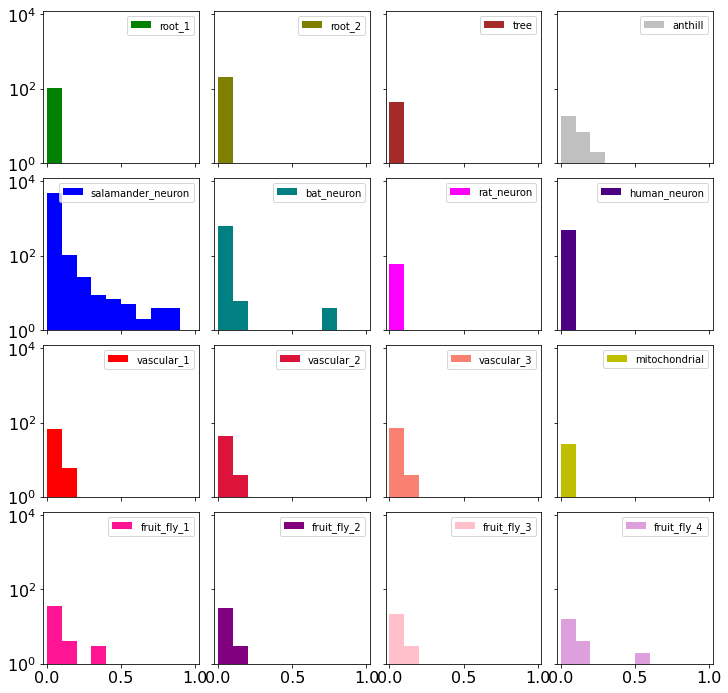

In [108]:
fig, axs = plt.subplots(4, 4, figsize=(12, 12),gridspec_kw={'hspace': 0.1, 'wspace': 0.1})
#fig.suptitle('Local density distribution')
#['vascular_1','tree','mouse_brain','mitochondrial','anthill','root_1','root_2','fruit_fly_2','fruit_fly_3','human_brain']

ij_name_dict = {'root_1':(0,0),'root_2':(0,1),'tree':(0,2),'anthill':(0,3)
                ,'salamander_neuron':(1,0),'bat_neuron':(1,1),'rat_neuron':(1,2), 'human_neuron':(1,3)
                ,'vascular_1':(2,0),'vascular_2':(2,1),'vascular_3':(2,2),'mitochondrial':(2,3)
                ,'fruit_fly_1':(3,0),'fruit_fly_2':(3,1),'fruit_fly_3':(3,2),'fruit_fly_4':(3,3)}
for name in name_list:
    
    axs[ij_name_dict[name][0]][ij_name_dict[name][1]].hist(all_densities_dict[name],color = color_dict[name],label=name,alpha=1,bins = np.arange(0,1.1,0.1))
    #lt.xlabel('Link mean number of intersections')
    axs[ij_name_dict[name][0]][ij_name_dict[name][1]].set_yscale('log')
    axs[ij_name_dict[name][0]][ij_name_dict[name][1]].set_xlim(-0.025,1.025)
    axs[ij_name_dict[name][0]][ij_name_dict[name][1]].set_ylim(1,12000)
    #axs[ij_name_dict[name][0]][ij_name_dict[name][1]].axvline(np.mean(all_densities_dict[name]),color='black',linestyle='dashed')#,label = 'mean')
    axs[ij_name_dict[name][0]][ij_name_dict[name][1]].legend()
    
for ax in axs.flat:
    ax.label_outer()


#plt.savefig('density_distribution.svg', format='svg')


# Complementary straightness

In [105]:
#plt.figure(figsize=(12,8))
c_straightness_dict = {}
for name in name_list:
    plt.figure(figsize=(12,8))
    #infile = open(name + ".c_straightness.pkl",'rb')
    #c_straightness = pickle.load(infile) 
    c_straightness = all_results[name]['c_straightness'].values()
    c_straightness_dict[name] =list(all_results[name]['c_straightness'].values())
    #plt.hist(c_straightness,label=name,density=True,color = color_dict[name])
    #plt.xlim(-0.05,1.05)
    #plt.yscale('log')
    ##plt.ylim(0,1)
    #plt.legend()
    #plt.xlabel('Complementary straightness')
    #plt.ylabel('Count')
    #plt.savefig(name +'_c_straightness.svg', format='svg')

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

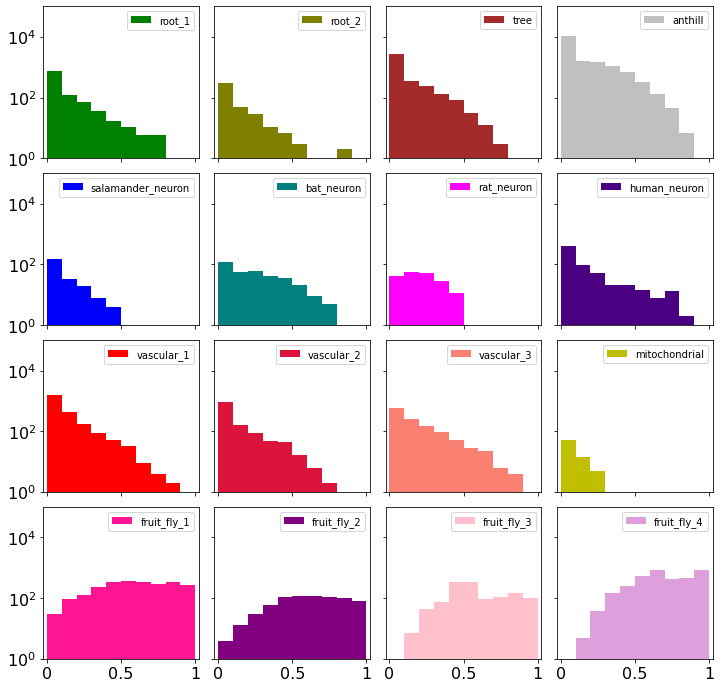

In [112]:
fig, axs = plt.subplots(4, 4, figsize=(12, 12),gridspec_kw={'hspace': 0.1, 'wspace': 0.1})
#fig.suptitle('Local density distribution')
#['vascular_1','tree','mouse_brain','mitochondrial','anthill','root_1','root_2','fruit_fly_2','fruit_fly_3','human_brain']

ij_name_dict = {'root_1':(0,0),'root_2':(0,1),'tree':(0,2),'anthill':(0,3)
                ,'salamander_neuron':(1,0),'bat_neuron':(1,1),'rat_neuron':(1,2), 'human_neuron':(1,3)
                ,'vascular_1':(2,0),'vascular_2':(2,1),'vascular_3':(2,2),'mitochondrial':(2,3)
                ,'fruit_fly_1':(3,0),'fruit_fly_2':(3,1),'fruit_fly_3':(3,2),'fruit_fly_4':(3,3)}
for name in name_list:
    
    axs[ij_name_dict[name][0]][ij_name_dict[name][1]].hist(c_straightness_dict[name],color = color_dict[name],label=name,alpha=1,bins = np.arange(0,1.1,0.1))
    #lt.xlabel('Link mean number of intersections')
    labels = axs[ij_name_dict[name][0]][ij_name_dict[name][1]].get_xticklabels()
    axs[ij_name_dict[name][0]][ij_name_dict[name][1]].set_xticks([0,0.5,1]) 
    axs[ij_name_dict[name][0]][ij_name_dict[name][1]].set_xticklabels([0,0.5,1])
    #axs[ij_name_dict[name][0]][ij_name_dict[name][1]].xticks([0,1])
    axs[ij_name_dict[name][0]][ij_name_dict[name][1]].set_yscale('log')
    axs[ij_name_dict[name][0]][ij_name_dict[name][1]].set_xlim(-0.025,1.025)
    axs[ij_name_dict[name][0]][ij_name_dict[name][1]].set_ylim(1,100000)
    axs[ij_name_dict[name][0]][ij_name_dict[name][1]].legend()
    #axs[ij_name_dict[name][0]][ij_name_dict[name][1]].axvline(np.mean(c_straightness_dict[name]),color='black',linestyle='dashed')
for ax in axs.flat:
    ax.label_outer()

#plt.xlabel('Complementary straightness')
plt.savefig(figure_save_path +'c_straightness.pdf', format='pdf',dpi=1200)
plt.savefig('c_straightness.pdf', format='pdf',dpi=1200)

In [118]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 16
import ast
import seaborn as sns
from scipy.stats import linregress
#sns.set_theme(style="whitegrid")
import math
from scipy.spatial import distance as dst

def create_line_point_list(start_point, end_point, density):

    parameter_list = np.linspace(0,1,density)
    line_point_list = []

    for t in parameter_list:
            x = (end_point[0] - start_point[0]) * t + start_point[0]
            y = (end_point[1] - start_point[1]) * t + start_point[1]
            z = (end_point[2] - start_point[2]) * t + start_point[2]
            line_point_list.append([x, y, z])
def create_line_point_radii_list(start_point, end_point,radius_start,radius_end,density):

    parameter_list = np.linspace(0,1,density)
    line_point_list = []

    for t in parameter_list:
            x = (end_point[0] - start_point[0]) * t + start_point[0]
            y = (end_point[1] - start_point[1]) * t + start_point[1]
            z = (end_point[2] - start_point[2]) * t + start_point[2]
            radius = (radius_end - radius_start) * t + radius_start
            line_point_list.append([x, y, z,radius])

    return line_point_list

def create_line_point_list(start_point, end_point, density):

    parameter_list = np.linspace(0,1,density)
    line_point_list = []

    for t in parameter_list:
            x = (end_point[0] - start_point[0]) * t + start_point[0]
            y = (end_point[1] - start_point[1]) * t + start_point[1]
            z = (end_point[2] - start_point[2]) * t + start_point[2]
            line_point_list.append([x, y, z])

    return line_point_list


def create_thick_line_point_list(start_point,orientation_point,distance_between_circles,radius_1,radius_2):
    distance = np.sqrt((orientation_point[0]-start_point[0])**2 +(orientation_point[1]-start_point[1])**2 +(orientation_point[2]-start_point[2])**2)
    number_of_points =  np.max([int(distance/distance_between_circles),2])
    #number_of_points = density
    if radius_1 == 0 and radius_2 == 0:
        line_point_list = create_line_point_list(start_point,orientation_point,number_of_points)
        return line_point_list 
    else:
        line_point_list = create_line_point_list(start_point,orientation_point,number_of_points)
        thick_points_list = []
        k = np.array([orientation_point[0]-start_point[0], orientation_point[1]-start_point[1] ,orientation_point[2]-start_point[2] ],dtype = float )
        k /= np.linalg.norm(k)
        x = np.random.randn(3)  # take a random vector
        x -= x.dot(k) * k       # make it orthogonal to k
        x /= np.linalg.norm(x)  # normalize it
        y = np.cross(k, x)
        for i, center_point in enumerate(line_point_list):
                parameter = i/len(line_point_list)
                radius = (radius_2 - radius_1) * parameter + radius_1
                n_vertices =  np.max([math.ceil(2 * radius * np.pi/ distance_between_circles),3])
                circle_point_list = []
                for j in range(0,n_vertices):
                    angle = (j / n_vertices) * 2 * np.pi

                    circle_x = center_point[0] + radius * np.cos(angle)*x[0] +  radius * np.sin(angle)*y[0]#* np.cos(incline_angle)
                    circle_y = center_point[1] + radius * np.cos(angle)*x[1] +  radius * np.sin(angle)*y[1]
                    circle_z = center_point[2] + radius * np.cos(angle)*x[2] +  radius * np.sin(angle)*y[2]

                    v = [circle_x,circle_y, circle_z]
                    #circle_point_list.append(v)
                    thick_points_list.append(v)

        if radius_1 > distance_between_circles:
            thick_points_list.append(start_point)
        if radius_2 > distance_between_circles:
            thick_points_list.append(orientation_point)

        if 2 * radius_1 > distance_between_circles:
            number_of_inner_circles = np.max([math.ceil( 2 * radius_1 / distance_between_circles),3])
            inner_radius_list = [radius_1 * parameter for parameter in np.linspace(0,1, number_of_inner_circles)[1:-1]]

            for inner_radius in inner_radius_list:
                center_point = start_point
                radius = inner_radius
                n_vertices =  np.max([math.ceil(2 * radius * np.pi/ distance_between_circles),3])
                circle_point_list = []
                for j in range(0,n_vertices):
                    angle = (j / n_vertices) * 2 * np.pi

                    circle_x = center_point[0] + radius * np.cos(angle)*x[0] +  radius * np.sin(angle)*y[0]#* np.cos(incline_angle)
                    circle_y = center_point[1] + radius * np.cos(angle)*x[1] +  radius * np.sin(angle)*y[1]
                    circle_z = center_point[2] + radius * np.cos(angle)*x[2] +  radius * np.sin(angle)*y[2]

                    v = [circle_x,circle_y, circle_z]
                    #circle_point_list.append(v)
                    thick_points_list.append(v)
        if 2 * radius_2 > distance_between_circles:
            number_of_inner_circles = np.max([math.ceil( 2 * radius_2 / distance_between_circles),3])
            inner_radius_list = [radius_2 * parameter for parameter in np.linspace(0,1, number_of_inner_circles)[1:-1]]
            for inner_radius in inner_radius_list:
                center_point = orientation_point
                radius = inner_radius
                n_vertices =  np.max([math.ceil(2 * radius * np.pi/ distance_between_circles),3])
                circle_point_list = []
                for j in range(0,n_vertices):
                    angle = (j / n_vertices) * 2 * np.pi

                    circle_x = center_point[0] + radius * np.cos(angle)*x[0] +  radius * np.sin(angle)*y[0]#* np.cos(incline_angle)
                    circle_y = center_point[1] + radius * np.cos(angle)*x[1] +  radius * np.sin(angle)*y[1]
                    circle_z = center_point[2] + radius * np.cos(angle)*x[2] +  radius * np.sin(angle)*y[2]

                    v = [circle_x,circle_y, circle_z]
                    #circle_point_list.append(v)
                    thick_points_list.append(v)

        return thick_points_list + line_point_list 
    
def bounding_box_from_merged_skeleton(merged_skeleton_dataset):
    x_min = np.min([np.min(merged_skeleton_dataset['x_1']),np.min(merged_skeleton_dataset['x_2'])])
    x_max = np.max([np.max(merged_skeleton_dataset['x_1']),np.max(merged_skeleton_dataset['x_2'])])

    y_min = np.min([np.min(merged_skeleton_dataset['y_1']),np.min(merged_skeleton_dataset['y_2'])])
    y_max = np.max([np.max(merged_skeleton_dataset['y_1']),np.max(merged_skeleton_dataset['y_2'])])

    z_min = np.min([np.min(merged_skeleton_dataset['z_1']),np.min(merged_skeleton_dataset['z_2'])])
    z_max = np.max([np.max(merged_skeleton_dataset['z_1']),np.max(merged_skeleton_dataset['z_2'])])

    return [x_min,x_max,y_min,y_max,z_min,z_max]

name_list =['monkey_neuron']
final_results ={}
for name in name_list:
    print('**** Network:',name)
    print('Starting computation')
    final_results[name] = {}
    path = '../1. data/5. skeleton_resolution/'
    skeleton_paths = pd.read_csv(path +  name+ '.paths.csv',index_col=[0])
    skeleton_paths.drop_duplicates(inplace=True)
    
    bounds = bounding_box_from_merged_skeleton(skeleton_paths)
    bounding_box_volume = abs(bounds[0] - bounds[1]) * abs(bounds[2] - bounds[3]) * abs(bounds[4] - bounds[5])
    longest_side = np.max([abs(bounds[0] - bounds[1]),abs(bounds[2] - bounds[3]),abs(bounds[4] - bounds[5])])
    shortest_side = np.min([abs(bounds[0] - bounds[1]),abs(bounds[2] - bounds[3]),abs(bounds[4] - bounds[5])])
    skeleton_paths['distance'] = np.sqrt((skeleton_paths['x_2']-  skeleton_paths['x_1'])**2 +  
                                               (skeleton_paths['y_2']-  skeleton_paths['y_1'])**2 +
                                               (skeleton_paths['z_2']-  skeleton_paths['z_1'])**2 )
    skeleton_paths['volume'] = 1/3 * np.pi * (skeleton_paths['radius_1']**2 + skeleton_paths['radius_2']**2 +    skeleton_paths['radius_1']*skeleton_paths['radius_2'])*skeleton_paths['distance']
    skeleton_paths_original = skeleton_paths.copy()
    final_results[name]['mean_segment_length'] = np.mean(skeleton_paths['distance'])
    final_results[name]['segment_length_list'] = skeleton_paths['distance'].values
    final_results[name]['mean_radius_length'] = np.mean(skeleton_paths['radius_1'])
    final_results[name]['radius_list'] = skeleton_paths['radius_1'].values
    final_results[name]['mean_segment_over_bounding_box_average_length'] = np.mean(skeleton_paths['distance'])/(np.mean([abs(bounds[0] - bounds[1]),
                                                                                                                          abs(bounds[2] - bounds[3]),
                                                                                                                          abs(bounds[4] - bounds[5])]))
    #print('Computing fractal dimension')
    #cube_side = np.max([skeleton_paths['distance'].max(),skeleton_paths['radius_1'].max()*2,skeleton_paths['radius_2'].max()*2])
    cube_side =  shortest_side *0.33
    #if name == 'fruit_fly_2' or name == 'fruit_fly_3' or name == 'human_brain':
    #    cube_side = np.max([skeleton_paths['distance'].max(),skeleton_paths['radius_1'].max()*2,skeleton_paths['radius_2'].max()*2])/10
    #This is for fruitfly
    #cube_side_list = [cube_side/20,cube_side/10,cube_side/5]
    #cube_side = np.max([skeleton_paths['distance'].mean(),skeleton_paths['radius_1'].mean()*2,skeleton_paths['radius_2'].mean()*2]) * 10
    cube_side_list = [cube_side * 0.1,cube_side* 0.25,cube_side]
    segment_resolution = np.min([skeleton_paths['distance'].mean(),skeleton_paths['radius_1'].mean(),skeleton_paths['radius_2'].mean()])/2
    final_results[name]['cube_side'] = cube_side
    final_results[name]['segment_resolution_distance'] = segment_resolution
    

    
    print('Skeleton multiplication')
    multiplied_skeleton_part_merged = []
    for row in skeleton_paths[['pt_id_1','x_1','y_1','z_1','radius_1','pt_id_2','x_2','y_2','z_2','radius_2']].values:
        start_point = row[1:4]
        radius_start = row[4]
        end_point = row[6:9]
        radius_end = row[9]
        point_to_point_dist = dst.euclidean(start_point,end_point)
        ratio = point_to_point_dist/ (cube_side)
        if ratio > 0.05:
            multiplication_factor = int(np.ceil(ratio)) + 10
           # print('Multiplying skeleton',multiplying_factor )
            new_points = create_line_point_radii_list(start_point, end_point, radius_start,radius_end,multiplication_factor)
            for i in range(0,multiplication_factor-1):
                multiplied_skeleton_part_merged += [list(new_points[i])+list(new_points[i+1])]
        else:
            new_row = [list(start_point) + [radius_start] + list(end_point) + [radius_end]]
            multiplied_skeleton_part_merged += new_row 

    multiplied_skeleton = pd.DataFrame(multiplied_skeleton_part_merged,columns=['x_1','y_1','z_1','radius_1','x_2','y_2','z_2','radius_2'])
    skeleton_paths = multiplied_skeleton.copy()
    print('Skeleton multiplication complete')
    
    point_cloud_list = []
    for i,row in enumerate(skeleton_paths[['x_1','y_1','z_1','radius_1','x_2','y_2','z_2','radius_2']].values):
        print( 'Computing fractal dimension',i,len(skeleton_paths))
        start_point = row[0:3]
        radius_start = row[3]
        end_point = row[4:7]
        radius_end = row[7]
        point_cloud_list += create_thick_line_point_list(start_point,end_point,segment_resolution, radius_start,radius_end)
    point_cloud_skeleton_paths  = pd.DataFrame(point_cloud_list,columns=['x','y','z'])
    sample_fraction = 1
    point_cloud_skeleton_paths = point_cloud_skeleton_paths.sample(frac=sample_fraction)
    
    
    filled_boxes_count_list = []
    number_of_segments_used_list = []
    for cube_side in cube_side_list:
        print('Cube side ratio:',cube_side/longest_side)
        x_axis = np.arange(bounds[0],bounds[1],cube_side)
        y_axis = np.arange(bounds[2],bounds[3],cube_side)
        z_axis = np.arange(bounds[4],bounds[5],cube_side)
        number_of_segments_used = 0
        filled_boxes_count = 0
        empty_boxes_count = 0
        box_count = 0
        cube_dict = {}
        for i in range(len(x_axis)-1):
                print(i,len(x_axis))
                box_count += 1
                for j in range(len(y_axis)-1):
                            for k in range(len(z_axis)-1):
                                if len(point_cloud_skeleton_paths[(point_cloud_skeleton_paths['x'] > x_axis[i]) & 
                                                            (point_cloud_skeleton_paths['x'] < x_axis[i+1]) &
                                                            (point_cloud_skeleton_paths['y'] > y_axis[j]) &
                                                            (point_cloud_skeleton_paths['y'] < y_axis[j+1]) &
                                                            (point_cloud_skeleton_paths['z'] > z_axis[k]) &
                                                            (point_cloud_skeleton_paths['z'] < z_axis[k+1])]) == 0:
                                    empty_boxes_count += 1
                                else:
                                    filled_boxes_count += 1
        filled_boxes_count_list.append(filled_boxes_count)
    fractal_dimension =  -linregress(np.log(cube_side_list),np.log(filled_boxes_count_list))[0]
    final_results[name]['fractal_dimension'] = np.round(fractal_dimension,3)
    with open("1. results_basic_properties/"+name + "_basic_results.pkl", "wb") as h:
           pickle.dump(final_results[name], h)    
            
            
    print('Computing density')

    skeleton_paths['distance'] = np.sqrt((skeleton_paths['x_2']-  skeleton_paths['x_1'])**2 +  
                                               (skeleton_paths['y_2']-  skeleton_paths['y_1'])**2 +
                                               (skeleton_paths['z_2']-  skeleton_paths['z_1'])**2 )
    skeleton_paths['volume'] = 1/3 * np.pi * (skeleton_paths['radius_1']**2 + skeleton_paths['radius_2']**2 +    skeleton_paths['radius_1']*skeleton_paths['radius_2'])*skeleton_paths['distance']
    
    
    x_axis = np.arange(bounds[0],bounds[1],cube_side)
    y_axis = np.arange(bounds[2],bounds[3],cube_side)
    z_axis = np.arange(bounds[4],bounds[5],cube_side)
    
    all_densities = []
    cube_dict = {}
    for i in range(len(x_axis)-1):
            cube_dict[i] = {}
            for j in range(len(y_axis)-1):
                        cube_dict[i][j] = {}
                        for k in range(len(z_axis)-1):
                            cube_dict[i][j][k] = []
    large_parts = []                    
    for i in range(len(x_axis)-1):
            print(i,len(x_axis))
            for j in range(len(y_axis)-1):
                        for k in range(len(z_axis)-1):
                            df_inside = skeleton_paths[(skeleton_paths['x_1'] > x_axis[i]) & 
                                                        (skeleton_paths['x_1'] < x_axis[i+1]) &
                                                        (skeleton_paths['y_1'] > y_axis[j]) &
                                                        (skeleton_paths['y_1'] < y_axis[j+1]) &
                                                        (skeleton_paths['z_1'] > z_axis[k]) &
                                                        (skeleton_paths['z_1'] < z_axis[k+1])&
                                                        (skeleton_paths['x_2'] > x_axis[i]) & 
                                                        (skeleton_paths['x_2'] < x_axis[i+1]) &
                                                        (skeleton_paths['y_2'] > y_axis[j]) &
                                                        (skeleton_paths['y_2'] < y_axis[j+1]) &
                                                        (skeleton_paths['z_2'] > z_axis[k]) &
                                                        (skeleton_paths['z_2'] < z_axis[k+1])]
                            all_densities.append(df_inside['volume'].sum()/cube_side**3)
                            
                            
    final_results[name]['density_list'] = all_densities
    final_results[name]['density_max'] = np.max(all_densities)
    with open("1. results_basic_properties/"+name + "_basic_results.pkl", "wb") as h:
        pickle.dump(final_results[name], h)
    
    
    print('Computing basic properites')            
    skeleton_paths = pd.read_csv(path +  name+ '.paths.csv',index_col=[0])
    skeleton_paths.drop_duplicates(inplace=True)
    skeleton_paths['distance'] = np.sqrt((skeleton_paths['x_2']-  skeleton_paths['x_1'])**2 +  
                                               (skeleton_paths['y_2']-  skeleton_paths['y_1'])**2 +
                                               (skeleton_paths['z_2']-  skeleton_paths['z_1'])**2 )
    skeleton_paths['volume'] = 1/3 * np.pi * (skeleton_paths['radius_1']**2 + skeleton_paths['radius_2']**2 +    skeleton_paths['radius_1']*skeleton_paths['radius_2'])*skeleton_paths['distance']
    segments_path_id = skeleton_paths[['bodyId_pre','bodyId_post','path_id']].copy()
    segments_path_id.drop_duplicates(inplace=True) 
    
    final_results[name]['number_of_links'] = len(set(segments_path_id['path_id'].values))
    final_results[name]['number_of_nodes'] = len(set(list(segments_path_id['bodyId_pre'].values) + list(segments_path_id['bodyId_post'].values)))
    final_results[name]['number_of_segments'] = len(skeleton_paths)
    with open("1. results_basic_properties/"+name + "_basic_results.pkl", "wb") as h:
           pickle.dump(final_results[name], h)
            
            
    print('Computing complementary straightness')
    connectome = segments_path_id
    connectome_list = connectome.values.tolist()
    connectome_loc = []
    for i,pair in enumerate(connectome_list):
        #print(i,pair)
        start_row = skeleton_paths[(skeleton_paths['pt_id_1'] == pair[0] ) & (skeleton_paths['path_id'] == pair[2] )]
        if len(start_row) == 0:
            start_row = skeleton_paths[(skeleton_paths['pt_id_2'] == pair[0] ) & (skeleton_paths['path_id'] == pair[2] )]
            start_loc = [start_row['x_2'].values[0],start_row['y_2'].values[0],start_row['z_2'].values[0]]
        else:
            start_loc = [start_row['x_1'].values[0],start_row['y_1'].values[0],start_row['z_1'].values[0]]

        end_row = skeleton_paths[(skeleton_paths['pt_id_2'] == pair[1] )& (skeleton_paths['path_id'] == pair[2] )]
        if len(end_row) == 0:
            end_row = skeleton_paths[(skeleton_paths['pt_id_1'] == pair[1] )& (skeleton_paths['path_id'] == pair[2] )]
            end_loc = [end_row['x_1'].values[0],end_row['y_1'].values[0],end_row['z_1'].values[0]]
        else:
            end_loc = [end_row['x_2'].values[0],end_row['y_2'].values[0],end_row['z_2'].values[0]]
        pair.append(start_loc)
        pair.append(end_loc)
        connectome_loc.append(pair)
        
    euclidean_path_length_list = []
    total_path_length_list = []
    contraction_list = []
    count = 0
    contraction_pairs = {}
    volume_pairs = {}
    for index,pair in enumerate(connectome_loc):
        #print(count)
        #print(pair)
        bodyid_pre = pair[0]
        bodyid_post = pair[1]
        skeleton_df = skeleton_paths[skeleton_paths['path_id'] == pair[2]].copy()
        #print(len(skeleton_df))

        point_list = skeleton_df[['x_1','y_1','z_1']].values.tolist()
        radius_list = skeleton_df[['radius_1']].values.tolist()
        distance_list = []
        volume_list =  []
        for i,row in skeleton_df.iterrows():
            point_start =  row[['x_1','y_1','z_1']].values.tolist()
            point_end =  row[['x_2','y_2','z_2']].values.tolist()
            radius_start =  row[['radius_1']].values.tolist()[0]
            radius_end = row[['radius_2']].values.tolist()[0]
            distance = np.sqrt((point_end[0] - point_start[0])**2 + (point_end[1] - point_start[1])**2 + (point_end[2] - point_start[2])**2 )
            distance_list.append(distance)
            volume = 1/3 * np.pi * distance * ( radius_start**2 + radius_end**2 + radius_start*radius_end)
            volume_list.append(volume)
        total_path_length = np.sum(distance_list)
        total_volume = np.sum(volume_list)
        if total_path_length > 0:
            total_path_length_list.append(total_path_length)

            # Sometimes, there is a switch between x1 and x2 in starting location, but path length is calculated starting from x1 always check
            # This means that paths are not sorted perfectly, in a sense that bodyidpre is first row x_1,y_1,z_1, as it might be x_2,y_2,z_2
            node_source = pair[3]
            node_target = pair[4]
            #print(node_source,node_target)

            euclidean_distance = np.sqrt((node_source[0]-node_target[0])**2 +(node_source[1]-node_target[1])**2 + (node_source[2]-node_target[2])**2) 
            euclidean_path_length_list.append(euclidean_distance)
            contraction = euclidean_distance/total_path_length
            contraction_list.append(contraction )
            contraction_pairs[pair[2]] = 1 - contraction
            volume_pairs[pair[2]] = total_volume
            #if contraction > 1:
            #    break
        count +=1 

    final_results[name]['c_straightness'] = contraction_pairs
    final_results[name]['link_volume'] = volume_pairs

    with open("1. results_basic_properties/"+name + "_basic_results.pkl", "wb") as h:
               pickle.dump(final_results[name], h)

**** Network: monkey_neuron
Starting computation
Skeleton multiplication


/tmp/ipykernel_23643/1265227071.py:190: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = point_to_point_dist/ (cube_side)


OverflowError: cannot convert float infinity to integer

In [120]:
skeleton_paths

,pt_id_1,x_1,y_1,z_1,radius_1,pt_id_2,x_2,y_2,z_2,radius_2,path_id,bodyId_pre,bodyId_post,distance,volume
0,1,0.00,0.00,0.0,0.5,2,0.32,0.36,0.0,0.5,0,1,2,0.481664,0.378298
1,1,0.00,0.00,0.0,0.5,3,-0.32,-0.36,0.0,0.5,1,1,3,0.481664,0.378298
2,1,0.00,0.00,0.0,0.5,4,0.55,0.81,0.0,0.5,2,1,10,0.979081,0.768969
3,4,0.55,0.81,0.0,0.5,5,1.12,1.63,0.0,0.5,2,1,10,0.998649,0.784337
4,5,1.12,1.63,0.0,0.5,6,1.69,2.46,0.0,0.5,2,1,10,1.006876,0.790799
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7501,7378,-129.85,-80.63,0.0,0.5,7379,-129.85,-81.63,0.0,0.5,115,7276,7383,1.000000,0.785398
7502,7379,-129.85,-81.63,0.0,0.5,7380,-129.84,-82.63,0.0,0.5,115,7276,7383,1.000050,0.785437
7503,7380,-129.84,-82.63,0.0,0.5,7381,-129.84,-83.63,0.0,0.5,115,7276,7383,1.000000,0.785398
7504,7381,-129.84,-83.63,0.0,0.5,7382,-129.84,-84.63,0.0,0.5,115,7276,7383,1.000000,0.785398


In [119]:
cube_side

0.0